In [ ]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.loc[data['gender'] == 'Female', 'gender'] = 0 
data.loc[data['gender'] == 'Male', 'gender'] = 1
data.loc[data['gender'] == 'Other', 'gender'] = 2

data.loc[data['smoking_history'] == 'never', 'smoking_history'] = 0
data.loc[data['smoking_history'] == 'No Info', 'smoking_history'] = 1 
data.loc[data['smoking_history'] == 'current', 'smoking_history'] = 2 
data.loc[data['smoking_history'] == 'former', 'smoking_history'] = 3 
data.loc[data['smoking_history'] == 'ever', 'smoking_history'] = 4 
data.loc[data['smoking_history'] == 'not current', 'smoking_history'] = 5 

In [ ]:
sample = random.sample(range(1, 100000), 49)

In [ ]:
data = data.loc[sample]
data = data.reset_index()

In [57]:
X = data.loc[:47]
y = data[-1:]

X = X.drop('index', axis=1)
y = y.drop('index', axis=1)

# Проверка аномалий по Граббсу

In [70]:
import numpy as np
from outliers import smirnov_grubbs as grubbs

for item in X.drop(['diabetes', 'hypertension', 'heart_disease', 'gender', 'smoking_history'], axis=1).columns:
    print(f'{item}: ', len(grubbs.test(np.array(X[item]), alpha=.05)))

age:  48
bmi:  48
HbA1c_level:  48
blood_glucose_level:  47


In [59]:
blood_glucose_level = grubbs.test(np.array(X['blood_glucose_level']), alpha=.05)

In [72]:
X = X.loc[X['blood_glucose_level'].isin(blood_glucose_level)]

# Проверка на мультиколлинеарность

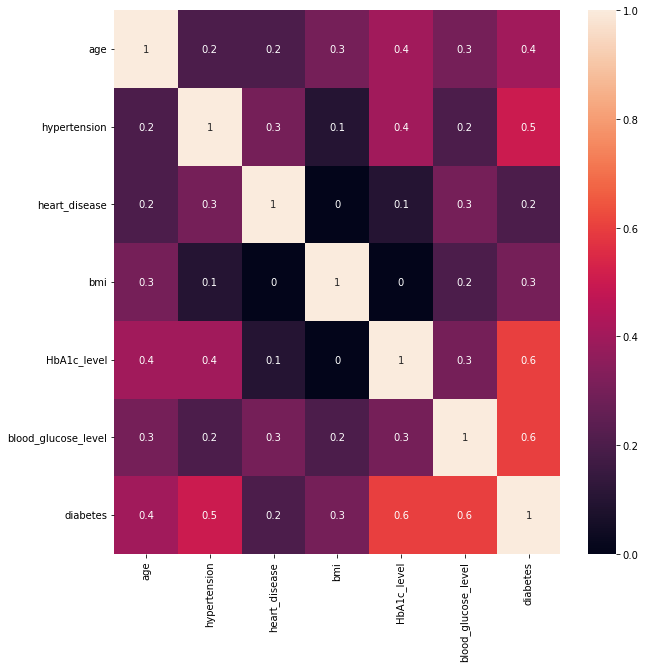

In [122]:
ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(round(abs(X.corr()), 1), annot=True)

# Построение регрессии 

In [124]:
import statsmodels.api as sm
import numpy as np

In [163]:
X_train = np.asarray(scaled_data, dtype=float).transpose()
y_train = np.asarray(X['diabetes'], dtype=float)

In [164]:
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

print(reg_m(y_train, X_train).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     7.757
Date:                Wed, 31 May 2023   Prob (F-statistic):           4.14e-06
Time:                        16:34:20   Log-Likelihood:                 11.361
No. Observations:                  47   AIC:                            -4.721
Df Residuals:                      38   BIC:                             11.93
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1120      0.036      3.141      0.0